In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

This model uses a neural network and GridSearchCV to predict share price impacts of Interest changes

# Read the CSV and Perform Basic Data Cleaning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df_stock1 = pd.read_csv("../../static/data/NAB.csv")
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last row to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]
# Drop last 3 columns Sentiment RBA FED
# N=3
# df = df_stock_less1.iloc[: , :-N]
df_stock_less1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT,RBA,FED,CPI
0,3/01/2000,22.164883,22.164883,22.164883,22.164883,6.412319,0.0,NEGATIVE,5.0,5.5,69.7
1,4/01/2000,21.869984,21.879498,21.308727,21.403856,6.192155,3005390.0,NEGATIVE,5.0,5.5,69.7
2,5/01/2000,20.918701,21.099445,20.785522,20.975779,6.068309,4604126.0,NEGATIVE,5.0,5.5,69.7
3,6/01/2000,21.207891,21.213600,20.642830,20.642830,5.971987,2574906.0,POSITIVE,5.0,5.5,69.7
4,7/01/2000,20.737959,20.880651,20.623804,20.823574,6.024276,3028993.0,POSITIVE,5.0,5.5,69.7


In [4]:
df_stock_less1.shape

(5692, 11)

# Use `RBA`,`FED` and `CPI` for the X values

In [5]:
X = df_stock_less1[["RBA","FED","CPI"]]
y = df_stock_less1["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5692, 3) (5692, 1)


In [6]:
X

,RBA,FED,CPI
0,5.00,5.50,69.7
1,5.00,5.50,69.7
2,5.00,5.50,69.7
3,5.00,5.50,69.7
4,5.00,5.50,69.7
...,...,...,...
5720,0.85,1.75,125.0
5721,0.85,1.75,125.0
5722,0.85,1.75,125.0
5723,0.85,1.75,125.0


# Create a Train Test Split

In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.info)

(4269, 3) (4269, 1)
(1423, 3) (1423, 1)
<bound method DataFrame.info of        RBA   FED    CPI
2945  4.75  0.25   99.8
3957  2.00  0.25  108.0
1552  5.50  4.25   83.8
1748  6.00  5.25   86.6
2318  4.25  0.25   92.5
...    ...   ...    ...
929   4.75  1.00   79.1
5225  0.25  1.25  116.2
4013  2.00  0.25  108.0
238   6.25  6.50   73.1
5190  0.25  1.25  114.4

[4269 rows x 3 columns]>


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model

In [9]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10172830690323897
Testing Score: 0.08982531852669007


In [10]:
# X_train = X_train.reshape((X_train.shape[0], 1))

In [11]:
#Linear Regression Residual showing difference actual vs predicted
# residual = pd.DataFrame([model.predict(X_train),y_train,(model.predict(X_train)-y_train)])
# residual.tail

Text(0.5, 1.0, 'Residual Plot')

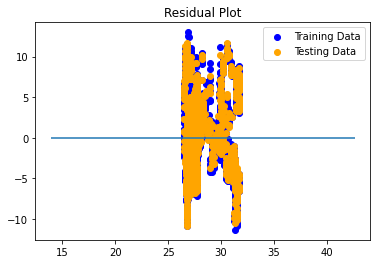

In [12]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [13]:
# Linear Regression: X_test predictions to variable
predictions = model.predict(X_test)

#### R2 Score is a very popular metric used for evaluating the performance of linear regression models. Where R2 Score is between 0 and 1, the closer to 1, the better the regression fit.
#### Use MSE or MAE when comparing two or more models, the lower the value of MSE or MAE, the better. MSE (Mean Square Error): Uses Euclidean distance to calculate the error. MSE gives the magnitude of the error only.

In [14]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 20.962734714941224, R2: 0.08982531852669007


#### Lasso regression imposes a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. It comes with a parameter, alpha , and the higher the alpha , the more feature coefficients are zero. When alpha is 0 , Lasso regression produces the same coefficients as a linear regression.

In [15]:
# LASSO model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 20.964215740141835, R2: 0.08976101433839823


In [16]:
# Ridge model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 20.96273483538255, R2: 0.08982531329728449


In [17]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 20.963734587562826, R2: 0.08978190535769015


# Hyperparameter Tuning

In [18]:
y_target = df_stock_less1["Close"]
y_target.shape

(5692,)

In [19]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_target, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4269, 3) (4269,)
(1423, 3) (1423,)


In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4269, 3) (4269,)
(1423, 3) (1423,)


#### GridSearchCV and RandomizedSearchCV are techniques to evaluate models for a given hyperparameter vector using cross-validation, hence the “CV” suffix of the class name.
#### We are executing many models together is to find which machine learning model works best for this particular dataset.

In [21]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [22]:
regressors = [
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [23]:
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

RandomForestRegressor()
	Training time: 0.169s
	Prediction time: 0.016s
	Explained variance: 0.9565130154331243
	Mean absolute error: 0.7531136203423189
	R2 score: 0.9565120562816269

DecisionTreeRegressor()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.9562515873872243
	Mean absolute error: 0.7550345539130624
	R2 score: 0.9562482007599175

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.003s
	Explained variance: 0.949784168691688
	Mean absolute error: 0.8021153422347154
	R2 score: 0.9497590417402608

GradientBoostingRegressor()
	Training time: 0.089s
	Prediction time: 0.003s
	Explained variance: 0.9331413752963718
	Mean absolute error: 0.9646401749446661
	R2 score: 0.9331407352773132

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.004s
	Explained variance: 0.949784168691688
	Mean absolute error: 0.8021153422347154
	R2 score: 0.9497590417402608

ExtraTreesRegressor()
	Training time: 0.136s
	Prediction time: 0.016s
	Explained v

#### By comparing these results, we can quickly see that RandomForestRegressor and DecisionTreeRegressor are the best models for our data
#### Machine learning models have parameters, which are the internal coefficients set by training or optimizing the model on a training dataset.
#### Parameters are different from hyperparameters. Parameters are learned automatically; hyperparameters are set manually to help guide the learning process.

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [26]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.7538 degrees.
Accuracy = 97.23%.
Model Performance
Average Error: 0.7522 degrees.
Accuracy = 97.24%.
Improvement of 0.01%.


In [ ]:
# Hyperparameter tuning has not improved accuracy significantly

In [ ]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
y_test_pred = model_rfr.predict(X_test)
y_test_pred

array([26.22038914, 29.18073973, 27.14413627, ..., 32.5174713 ,
       27.99549582, 26.64180685])

In [ ]:
#RandomForestRegressor Residual showing difference actual vs predicted
residual_dtr = pd.DataFrame([model_rfr.predict(X_train),y_train,(model_rfr.predict(X_train)-y_train)])
residual_dtr.tail

<bound method NDFrame.tail of         0          1          2          3          4          5     \
0  22.469184  31.246238  30.269307  36.004666  18.539518  32.167420   
1  24.238678  32.294762  30.250784  35.283070  19.729599  33.294888   
2  -1.769494  -1.048524   0.018523   0.721596  -1.190081  -1.127468   

        6          7          8          9     ...       4259       4260  \
0  29.478358  24.757946  26.641807  29.202352  ...  27.144136  24.127357   
1  29.510000  25.123371  26.921295  28.947527  ...  27.670000  23.563267   
2  -0.031642  -0.365425  -0.279488   0.254825  ...  -0.525864   0.564090   

       4261       4262       4263       4264       4265       4266       4267  \
0  26.38963  24.757946  23.101252  30.519286  17.799253  31.246238  26.959702   
1  25.02000  23.249344  22.412216  30.441040  18.340000  29.438696  28.371050   
2   1.36963   1.508602   0.689036   0.078246  -0.540747   1.807542  -1.411348   

        4268  
0  16.865652  
1  15.170000  
2   1.6956

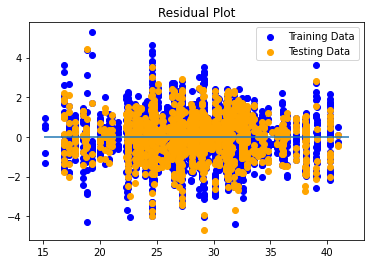

In [ ]:
# Make predictions using fitted model
predictions1 = model_rfr.predict(X_test)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(model_rfr.predict(X_train), y_train - model_rfr.predict(X_train), c="blue", label="Training Data")
plt.scatter(model_rfr.predict(X_test), y_test - model_rfr.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [ ]:
import pickle
filename = '../../static/nab_model_rfr.sav'
pickle.dump(model, open(filename, 'wb'))
model_in_rfr = pickle.load(open(filename, 'rb'))

In [ ]:
# from joblib import dump,load
# model_in_rfr = load('NAB_model_rfr.sav')

In [ ]:
rba = float(0.85)
fed = float(1.75)
cpi = float(125.00)
input =40
rfr=[]

def randomforest(rba,fed,cpi):
    for i in range(0,input):
      rfr.append([rba,fed,cpi])
      np.round_(rfr,2,out = None) 
      df = pd.DataFrame(rfr, columns = ['RBA','FED',"CPI"])
      df.round(2)
      pred_rf=model_in_rfr.predict(df)
      df['Prediction'] = pred_rf
      df['Prediction'] = df['Prediction'].astype(float).round(2)
      rba+=0.01
      fed+=0.01
      cpi+=0.01
      print(df)
    my_rforest = df.to_dict(orient='records')
    for dict_value in my_rforest:
      for k, v in dict_value.items():
        dict_value[k] = round(v, 2)
    return my_rforest
# print(my_rforest)
my_rf = randomforest(rba,fed,cpi)
print(my_rf)


    RBA   FED    CPI  Prediction
0  0.85  1.75  125.0       27.95
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       27.95
1  0.86  1.76  125.01       27.97
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       27.95
1  0.86  1.76  125.01       27.97
2  0.87  1.77  125.02       27.98
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       27.95
1  0.86  1.76  125.01       27.97
2  0.87  1.77  125.02       27.98
3  0.88  1.78  125.03       27.99
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       27.95
1  0.86  1.76  125.01       27.97
2  0.87  1.77  125.02       27.98
3  0.88  1.78  125.03       27.99
4  0.89  1.79  125.04       28.01
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       27.95
1  0.86  1.76  125.01       27.97
2  0.87  1.77  125.02       27.98
3  0.88  1.78  125.03       27.99
4  0.89  1.79  125.04       28.01
5  0.90  1.80  125.05       28.02
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       27.95
1  0.86  1.76  1

In [ ]:
rba = float(0.85)
fed = float(1.75)
cpi = float(125.00)
def rforest(rba,fed,cpi):
    dtr =[[rba,fed,cpi]]
    df = pd.DataFrame (dtr, columns = ['RBA','FED',"CPI"])
    pred_dtr=model_in_rfr.predict(df)
    df['Prediction'] = pred_dtr
    print(df)
    df_dict = df.to_dict(orient='records')
    return pred_dtr
Pred_rf = rforest(rba,fed,cpi)
print(Pred_rf)

    RBA   FED    CPI  Prediction
0  0.85  1.75  125.0   27.954295
[27.95429476]


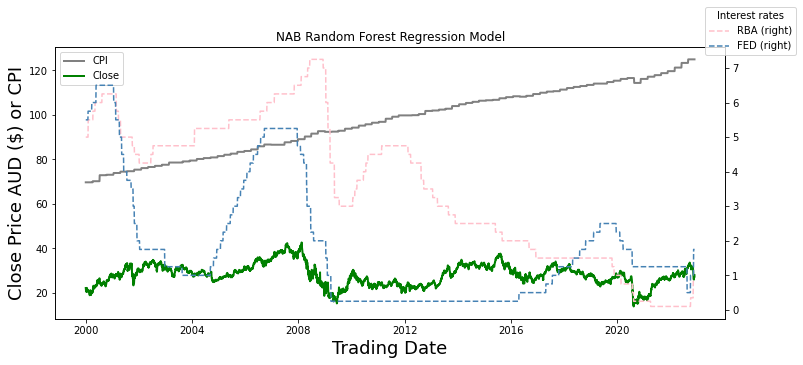

In [ ]:
x = np.arange(2000,2024,4)
ax = df_stock_less1.plot(y=["CPI","Close"], figsize=(12, 5),color=['grey','green'],linewidth=2)
df_stock_less1.plot(y=["RBA","FED"],secondary_y=True, ax=ax,color=['pink','steelblue'],linestyle='dashed')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=-4, title="Interest rates")
ax.legend(loc='upper left')
ax.set_xticks([0,1000,2000,3000,4000,5000])
ax.set_xticklabels(x, rotation=0)
ax.set_title('NAB Random Forest Regression Model')
ax.set_xlabel('Trading Date', fontsize=18)
ax.set_ylabel('Close Price AUD ($) or CPI', fontsize=18)
plt.savefig('../../static/data/images/NAB_tree.png')

#Save predicted error to MongoDB

In [ ]:
# Module used to connect Python with MongoDb
import pymongo

In [ ]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define the 'sharesDB' database in Mongo
db = client.sharesDB.companys

In [ ]:
# query the companys collection
companys = db.find()
# see change in the collection
for company in companys:
    print(company)

{'_id': ObjectId('62be5c40e95d9c2fd3be8c1f'), 'model': 'LSTM', 'name': 'BHP', 'date': '28/06/2022', 'predicted': 40, 'actual': 42, 'differece': -2, 'rmse': 0.06586}
{'_id': ObjectId('62be7229a83f80add8272115'), 'model': 'LSTM', 'name': 'CBA', 'date': '28/06/2022', 'predicted': 88, 'actual': 93, 'differece': -5, 'rmse': 2.06539}
{'_id': ObjectId('62be73734cebc85c036027db'), 'model': 'LSTM', 'name': 'CSL', 'date': '28/06/2022', 'predicted': 269, 'actual': 274, 'differece': -5, 'rmse': 2.37099}
{'_id': ObjectId('62be74a49c5dda6983912be2'), 'model': 'LSTM', 'name': 'NAB', 'date': '28/06/2022', 'predicted': 27, 'actual': 27, 'differece': 0, 'rmse': 0.16451}
{'_id': ObjectId('62be74fb286df5ebd4ec3dc5'), 'model': 'LSTM', 'name': 'WBC', 'date': '28/06/2022', 'predicted': 20, 'actual': 19, 'differece': 1, 'rmse': 0.10867}
{'_id': ObjectId('62bea6cc0994fe23ecdfe680'), 'model': 'RFR', 'name': 'WBC', 'date': '23/06/2022', 'predicted': 31, 'actual': 19, 'differece': 12.953687103041862, 'accuracy': 

In [ ]:
#save last price actual to variable
actual_price = df_stock3.iloc[-1,4]
actual_date = df_stock3.iloc[-1,0] 
actual_price = int(actual_price)
print(actual_price,actual_date,base_accuracy)


27 28/06/2022 97.2312854372982


In [ ]:
# Set keys and values of company
name = 'NAB'
predicted = int(Pred_rf)
difference = Pred_rf-actual_price
print(f'date {actual_date},predicted {predicted},actual {actual_price}, difference {difference[0]}, accuracy {round(base_accuracy,2)}')

date 28/06/2022,predicted 27,actual 27, difference 0.9542947613932071, accuracy 97.23


In [ ]:
# Delete a document from a collection
db.delete_one(
    {'model': 'RFR','name': name}
)


In [ ]:
# Insert a document into the 'companys' collection
db.insert_one(
    {
      'model': 'RFR',
      'name': name,
      'date': actual_date,
      'predicted': predicted,
      'actual': actual_price,
      'differece': difference[0],
      'accuracy': round(base_accuracy,2)        
    }
)

# query the classroom collection
companys = db.find()

# see change in collection
for company in companys:
    print(company)

{'_id': ObjectId('62be5c40e95d9c2fd3be8c1f'), 'model': 'LSTM', 'name': 'BHP', 'date': '28/06/2022', 'predicted': 40, 'actual': 42, 'differece': -2, 'rmse': 0.06586}
{'_id': ObjectId('62be7229a83f80add8272115'), 'model': 'LSTM', 'name': 'CBA', 'date': '28/06/2022', 'predicted': 88, 'actual': 93, 'differece': -5, 'rmse': 2.06539}
{'_id': ObjectId('62be73734cebc85c036027db'), 'model': 'LSTM', 'name': 'CSL', 'date': '28/06/2022', 'predicted': 269, 'actual': 274, 'differece': -5, 'rmse': 2.37099}
{'_id': ObjectId('62be74a49c5dda6983912be2'), 'model': 'LSTM', 'name': 'NAB', 'date': '28/06/2022', 'predicted': 27, 'actual': 27, 'differece': 0, 'rmse': 0.16451}
{'_id': ObjectId('62be74fb286df5ebd4ec3dc5'), 'model': 'LSTM', 'name': 'WBC', 'date': '28/06/2022', 'predicted': 20, 'actual': 19, 'differece': 1, 'rmse': 0.10867}
{'_id': ObjectId('62bea6cc0994fe23ecdfe680'), 'model': 'RFR', 'name': 'WBC', 'date': '23/06/2022', 'predicted': 31, 'actual': 19, 'differece': 12.953687103041862, 'accuracy': 